## KNNR 

## Gerekli Kütüphanelerin Yüklenmesi
* pandas: Veri işleme ve analiz için kullanılır, özellikle veri çerçeveleri (DataFrame) ile çalışır.
* numpy: Matematiksel hesaplamalar ve matris işlemleri için kullanılır.
* train_test_split : Veri setini eğitim ve test setlerine ayırmada kullanılır.
* KNeighborsRegressor: K-Nearest Neighbors algoritması ile regresyon modeli oluşturmak için kullanılır. KNNR algoritması için.
* mean_squared_error : Modelin hata oranını hesaplanması için kullanılır.
* r2_score : Modelin doğruluğunu değerlendirilmesi için  kullanılır.
* StandardScaler: Veriyi standartlaştırır. Her bir özelliğin ortalaması 0, standart sapması 1 olacak şekilde yeniden ölçeklendirir.
* seaborn: İleri düzey görselleştirmeler için kullanılır.
* matplotlib: Grafik çizimi yapmak için kullanılır. Veri görselleştirilmesi için kullanılır.
* sm: İstatistiksel analiz için kullanılır. Modelin genel anlamlılığınının test edilmesi işleminde kullanılır.

In [113]:
# Gerekli kütüphanelerin yüklenmesi
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 

## Excel Verisinin Çalıştırma Ortamına Aktarılması ve Sayfaların Birleştirilmesi
* Bağımsız Değişkenler (Girdiler yani x):
**AT (Ortam Sıcaklığı), V (Egzoz Vakumu), AP (Ortam Basıncı), RH (Bağıl Nem)**
* Bağımlı Değişken (Çıktı yani y):
**PE (Net Saatlik Elektrik Enerjisi Çıktısı)**
* file_path = 'Folds5x2_pp.xlsx': Okunacak Excel dosyasının dosya yolu belirtilir.
* sheet1 = pd.read_excel(file_path, sheet_name='Sheet1'): Excel dosyasındaki "Sheet1" adlı sayfayı okur ve sheet1 değişkenine atar.
* sheet2 = pd.read_excel(file_path, sheet_name='Sheet2'): Excel dosyasındaki "Sheet2" adlı sayfayı okur ve sheet2 değişkenine atar.
* data = pd.concat([sheet1, sheet2], ignore_index=True): sheet1 ve sheet2 veri çerçevelerini (dataframe) birleştirir. 
* ignore_index=True parametresi, yeni veri setinde sıralamanın yeniden başlamasını sağlar, yani indeksler sıfırlanır.
* data.head(): Birleştirilen veri setinin ilk 5 satırını gösterir. Bu, veri setini hızlıca incelemek için kullanılabilir.

In [114]:
file_path = 'Folds5x2_pp.xlsx'

# Sheet1 ve Sheet2'yi okuma işlemi
sheet1 = pd.read_excel(file_path, sheet_name='Sheet1')
sheet2 = pd.read_excel(file_path, sheet_name='Sheet2')

# Veri setini birleştirme işlemi
data = pd.concat([sheet1, sheet2], ignore_index=True)

# İlk 5 satırı gösterme head()
data.head()


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


## Veri Setinin Özet Bilgisini Gösterme
* Toplam Veri Sayısı: 19136
* Veri Tipi: float64 

In [115]:
# Veri setinin özet bilgisi
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19136 entries, 0 to 19135
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      19136 non-null  float64
 1   V       19136 non-null  float64
 2   AP      19136 non-null  float64
 3   RH      19136 non-null  float64
 4   PE      19136 non-null  float64
dtypes: float64(5)
memory usage: 747.6 KB
None


## Eksik Değer Kontrolünün Yapılması
* Eksik değerimiz yok.

In [116]:
# Eksik değer kontrolünün yapılması 
print(data.isnull().sum())

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64


## Veri Setinin Özet İstatistiklerini Gösterme 
* count: Her sütundaki veri sayısını gösterir. 
* mean: Her sütunun ortalama değerini gösterir.
* std: Standart sapmayı ifade eder, yani verilerin dağılımını gösterir.
* min: Her sütundaki en küçük değeri gösterir.
* 25% (1. çeyrek): Verilerin %25'inin altında kaldığı değeri ifade eder.
* 50% (Medyan): Ortadaki değeri ifade eder, verilerin %50'si bu değerin altında, %50'si üstündedir.
* 75% (3. çeyrek): Verilerin %75'inin altında kaldığı değeri ifade eder.
* max: Her sütundaki en büyük değeri gösterir.

In [117]:
# Veri setinin özet istatistikler gösterme
data.describe()


,AT,V,AP,RH,PE
count,19136.000000,19136.000000,19136.000000,19136.000000,19136.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452278,12.707561,5.938629,14.599887,17.066549
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


## Bağımsız ve Bağımlı Değişkenlerin Ayrılması İşlemi
* Bağımsız Değişkenler:  "AT", "V", "AP", "RH"
**AT (Ortam Sıcaklığı), V (Egzoz Vakumu), AP (Ortam Basıncı), RH (Bağıl Nem)**
* Bağımlı Değişken: "PE" 
**PE (Net Saatlik Elektrik Enerjisi Çıktısı)**

In [118]:

# Hedef değişken (PE) ve bağımsız değişkenleri ayırma
X = data.drop("PE", axis=1)
y = data["PE"]

# ilk 5 tanesi gösterme
print("Bağımsız Değişkenler:\n", X.head())
print("Bağımlı Değişken:\n", y.head())

Bağımsız Değişkenler:
       AT      V       AP     RH
0  14.96  41.76  1024.07  73.17
1  25.18  62.96  1020.04  59.08
2   5.11  39.40  1012.16  92.14
3  20.86  57.32  1010.24  76.64
4  10.82  37.50  1009.23  96.62
Bağımlı Değişken:
 0    463.26
1    444.37
2    488.56
3    446.48
4    473.90
Name: PE, dtype: float64


## Veriyi Eğitim ve Test Setlerine Ayırma
* train_test_split: Veriyi eğitim ve test setlerini %80 eğitim ve %20 test olacak şekilde bölüme işlemi yapıldı.
* StandardScaler: Eğitim ve test verilerini standartlaştırır(Ortalama 0, standart sapma 1 olacak şekilde).
* X_train.shape, X_test.shape, y_train.shape, y_test.shape: Eğitim ve test setlerinin boyutlarını kontrol etme işlemi.
* random_state: Veri bölme işleminin her çalışmada aynı sonuçları üretmesi için rastgelelik kontrolü sağlanması.

In [119]:
# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi Ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ölçeklendirilmiş eğitim ve test setlerinin boyutları
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15308, 4), (3828, 4), (15308,), (3828,))

## Korelasyon Katsayısının Görselleştrilmesi
* Bağımsız Değişkenler :
**AT (Ortam Sıcaklığı), V (Egzoz Vakumu), AP (Ortam Basıncı), RH (Bağıl Nem)**
* Bağımlı Değişken :
**PE (Net Saatlik Elektrik Enerjisi Çıktısı)**


* Sütunlar arasındaki doğrusal ilişki ölçülür. Yani değişkenler arasındaki ilişkiyi görselleştirir.
1: Pozitif güçlü ilişki (bir artarken diğeri de artar).
-1: Negatif güçlü ilişki (bir artarken diğeri azalır).
0: Hiçbir ilişki yok.

X ve Y koordinatlarında değişkenlerin isimleri yer alır .
Her hücre, iki değişken arasındaki korelasyon katsayısını gösterir.

* korelasyon_katsayisi = data.corr(): Veri setindeki tüm sayısal değişkenler arasındaki korelasyon katsayılarını hesaplar ve eğişkenler arasındaki doğrusal ilişkiyi gösterir.
* Renklerin Anlamları:
Mavi tonları: Negatif ilişkiyi temsil eder.
Kırmızı tonları: Pozitif ilişkiyi temsil eder.
* plt.figure(figsize=(8, 6)): Grafiğin boyutlarını 8x6 inç olarak ayarlar.
* annot=True: Matrisin her hücresine, o hücredeki değeri (korelasyon katsayısını) yazar.
* cmap="coolwarm": Renk paletini "coolwarm" olarak belirler, burada kırmızı ve mavi renkler ilişkiyi ifade eder.
* cbar=True: Grafiğin yan tarafına renk skalası ekler (renklerin korelasyon katsayıları ile olan ilişkisini gösterir).
* pad=20: Başlık ile grafik arasında boşluk oluşturmak için kullanıldı.
* fontsize= Başlığın boyutunu belirlemek için kullanıldı.
* rotation : Etiketlerin açılarını ayarlamak için kullanıldı.


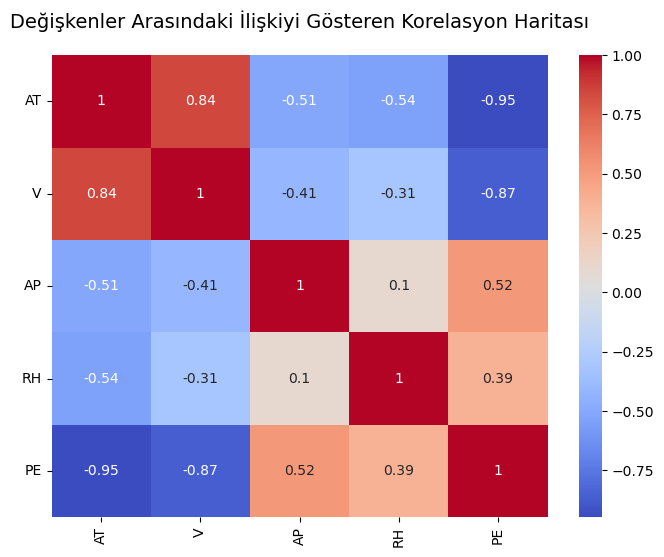

In [120]:
korelasyon_katsayisi = data.corr()

# Korelasyon matrisi görselleştirme (kutu içi değerlerle)
plt.figure(figsize=(8, 6))
sns.heatmap(korelasyon_katsayisi, annot=True, cmap="coolwarm", cbar=True)
plt.title("Değişkenler Arasındaki İlişkiyi Gösteren Korelasyon Haritası", pad=20, fontsize=14)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

## Model Oluşturma ve Eğitme
* k_range: K-en yakın komşu algoritmasında n_neighbors parametresini 1'den 99'a kadar denemek için bir aralık oluşturuldu.
* scores: Farklı k değerleri için modelin performansını (MSE) saklanır.
* knnr_model.fit(X_train, y_train): Her k değeri için KNNR modelini eğitim verisiyle eğitir.
* y_pred_knnr = knnr_model.predict(X_test): Test verisiyle modelin tahminlerini üretilmesi
* mean_squared_error(y_test, y_pred_knnr): Tahmin edilen değerlerle gerçek değerler arasındaki hata oranını (MSE) hesaplama işlemini gerçekleştirme.
* best_k: Minimum MSE'yi veren en iyi k değerini temsil eder.
* knnr_model = KNeighborsRegressor(n_neighbors=best_k): En iyi k değeriyle KNNR modeli yeniden oluşturma işlemi.
* mse_knnr: Modelin test verisindeki hata oranını yazdırır.

In [121]:
# knnr modelindeki n_neighbors parametresi için en uygun degeri bulma
k_range = range(1, 100)
scores = []

for k in k_range:
    knnr_model = KNeighborsRegressor(n_neighbors=k)
    # Modeli eğitme
    knnr_model.fit(X_train, y_train)
    # Modelin performansını değerlendirme
    y_pred_knnr = knnr_model.predict(X_test)
    mse_knnr = mean_squared_error(y_test, y_pred_knnr)
    scores.append(mse_knnr)

# En iyi k değerini bulma ve yazdırma
best_k = k_range[scores.index(min(scores))]
print(f"En iyi k değeri: {best_k}")

# En iyi k ile KNNR modelini tekrar eğitme
# Model oluşturma (1 değeri en iyi değeri verdi)
knnr_model = KNeighborsRegressor(n_neighbors=best_k)
# Modeli eğitme
knnr_model.fit(X_train, y_train)

y_pred_knnr = knnr_model.predict(X_test)
mse_knnr = mean_squared_error(y_test, y_pred_knnr)
print(f"En iyi KNNR MSE: {mse_knnr:.2f}")



En iyi k değeri: 1
En iyi KNNR MSE: 2.92


## Model Performansının Değerlendirilmesi İşlemi
* Eğitim ve Test Seti için ayrı ayrı performans degerlendirilmesi yapıldı.
* r2_score modelin doğruluk oranını hesaplamak için kullanılır. (R^2)
* R^2 değeri 1'e ne kadar yakın olursa modelin doğruluğu o kadar yüksek olur.
* mean_squared_error(y_test, y_pred_knnr): Tahmin edilen değerlerle gerçek değerler arasındaki hata oranını (MSE) hesaplama işlemini gerçekleştirme.
* MSE(mean_squared_error) değeri ne kadar düşük çıkarsa modelin hata oranı o kadar düşüktür.


In [122]:
# Test verisi için modelin hata oranını (MSE) hesaplanması işlemi
mse_test = mean_squared_error(y_test, y_pred_knnr)
#Test verisi için modelin doğruluk oranını (R^2) hesaplar.
r2_test = r2_score(y_test, y_pred_knnr)

# Egitim verisi için modelin hata oranını (MSE) hesaplanması işlemi
mse_egitim = mean_squared_error(y_train, knnr_model.predict(X_train))
# Eğitim verisi için modelin doğruluk oranını (R^2) hesaplar.
r2_egitim = r2_score(y_train, knnr_model.predict(X_train))

print("-"*40)
print(f"Test KNNR MSE: {mse_test:.2f}")
print(f"Test KNNR R^2: {r2_test:.2f}")
print("-"*40)
print(f"Eğitim KNNR MSE: {mse_egitim:.2f}")
print(f"Eğitim KNNR R^2: {r2_egitim:.2f}")

----------------------------------------
Test KNNR MSE: 2.92
Test KNNR R^2: 0.99
----------------------------------------
Eğitim KNNR MSE: 0.00
Eğitim KNNR R^2: 1.00


## Modelin Anlamlılığının Test Edilmesi
* F-İstatistiği, bağımsız değişkenlerin bağımlı değişken üzerinde anlamlı bir açıklama gücüne sahip olup olmadığını test eder. Bu değer, modelin genel performansının iyi olduğunu belirlemeye yardımcı olur.
* F-İstatistiği Değeri: F-İstatistiği ne kadar yüksekse, bağımsız değişkenlerin modelde anlamlı bir rol oynadığı ve modelin performansı genel olarak iyi olduğunu gösterir.
* p-Değeri: F-İstatistiği ne kadar yüksek çıkarsa, p-değeri de o kadar düşük(genellikle 0.05'in altında) çıkmalıdır ve bu değerler modelde kullanılan değişkenlerin istatistiksel olarak anlamlı olduğunu gösterir. 
* print(EKKY.summary()): Modelin önemli istatistiksel metriklerini yazdırır. Bu özet, modelin doğruluğunu ve anlamlılığını değerlendirilmesinde kullanılır.

In [123]:
E_sabiti = sm.add_constant(X_train) 
EKKY = sm.OLS(y_train, E_sabiti).fit() 
f_statistic = EKKY.fvalue 
p_value = EKKY.f_pvalue 
print(f'F-İstatistiği: {f_statistic:.2f}') 
print(f'p-Değeri: {p_value:.15f}')
print(EKKY.summary())

F-İstatistiği: 50299.27
p-Değeri: 0.000000000000000
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 5.030e+04
Date:                Wed, 01 Jan 2025   Prob (F-statistic):               0.00
Time:                        17:09:07   Log-Likelihood:                -44865.
No. Observations:               15308   AIC:                         8.974e+04
Df Residuals:                   15303   BIC:                         8.978e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


## RMSE (Root Mean Squared Error) Hesaplama
* rmse_knnr = np.sqrt(mse_test): Test verisi için ortalama kare hatanın (MSE) karekökünü alarak, modelin tahmin hatasının kökünü (RMSE) hesaplar. 

In [124]:
# RMSE (Root Mean Squared Error)
rmse_knnr = np.sqrt(mse_test)
print(f"KNNR RMSE: {rmse_knnr:.2f}")


KNNR RMSE: 1.71


## Gerçek ve Tahmin Edilen Değerleri Görselleştirilmesi
* yatay değerler 'Gerçek PE Değerleri'
* dikey değerler 'Tahmin Edilen PE Değerleri'
* plt.show(): grafiği ekranda gösterir

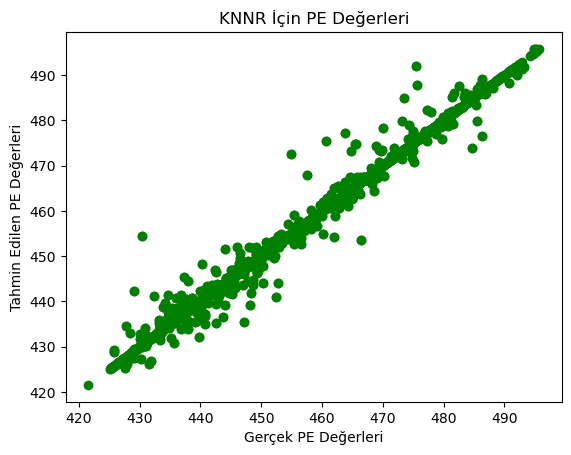

In [125]:
# Gerçek ve tahmin edilen değerleri görselleştirmek
plt.scatter(y_test, y_pred_knnr, color="green")
plt.xlabel('Gerçek PE Değerleri')
plt.ylabel('Tahmin Edilen PE Değerleri')
plt.title('KNNR İçin PE Değerleri')
plt.show()

## Eğitim ve Test Performans Grafiklerinin Çizimi
* plt.figure(figsize=(12, 6)): Grafik boyutunu 12x6 inç olarak ayarlar.
* plt.subplot(1, 2, 1): Grafiğin sol tarafında eğitim seti performans grafiğini oluşturulması.
* plt.subplot(1, 2, 2): Grafiğin sağ tarafında test seti performans grafiğini oluşturulması.
* plt.scatter(y_train, knnr_model.predict(X_train), color='blue', label='Tahminler'): Eğitim setindeki gerçek değerler ile tahmin edilen değerler arasındaki ilişkiyi mavi noktalarla gösterir.
* plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label='Reg_Doğrusu'): Gerçek değerler ile tahmin edilen değerlerin eşit olduğu doğrunun kırmızı kesikli çizgisini çizer (regresyon doğrusu).
* lw=2: Çizilen regresyon doğrusunun kalınlığını ayarlar.("line width" yani "çizgi kalınlığı")
* plt.legend(): Grafikteki etiketleri gösterir. ( Tahminler - Reg_Doğrusu).
* plt.tight_layout(): Grafiklerin yerleşimini sıkıştırarak daha düzenli hale getirir.
* plt.show(): Grafikleri ekranda gösterir.


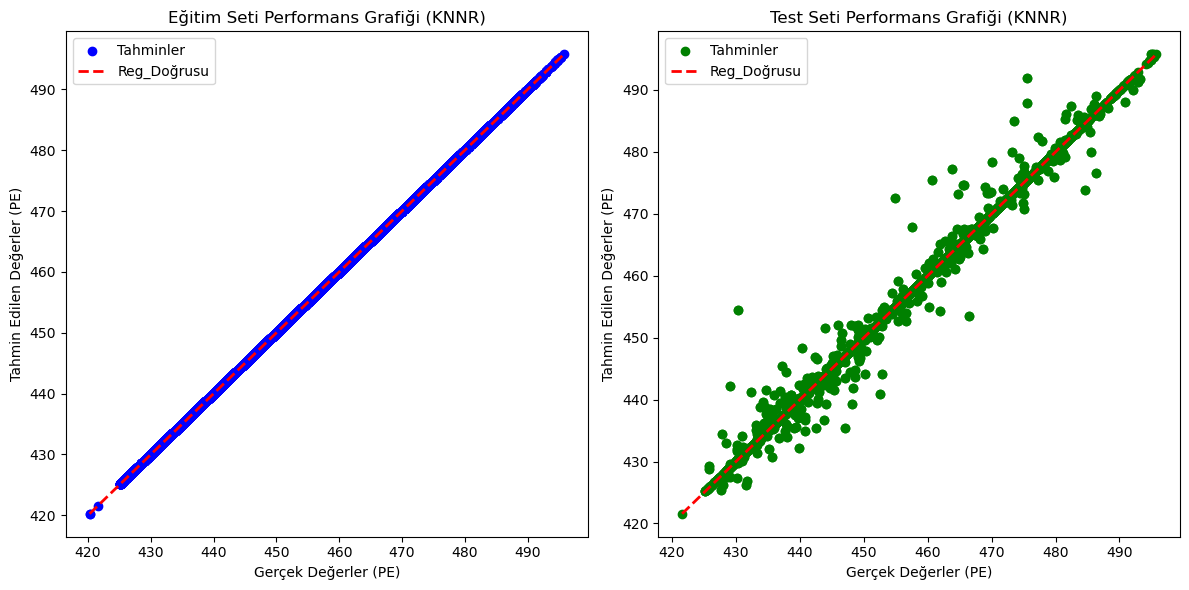

In [126]:
# Eğitim ve Test Performans Grafiklerinin Çizimi
plt.figure(figsize=(12, 6))

# Eğitim Seti Performans Grafiği
plt.subplot(1, 2, 1)
plt.scatter(y_train, knnr_model.predict(X_train), color='blue', label='Tahminler')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label='Reg_Doğrusu')
plt.xlabel('Gerçek Değerler (PE)')
plt.ylabel('Tahmin Edilen Değerler (PE)')
plt.title('Eğitim Seti Performans Grafiği (KNNR)')
plt.legend()

# Test Seti Performans Grafiği
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_knnr, color='green', label='Tahminler')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Reg_Doğrusu')
plt.xlabel('Gerçek Değerler (PE)')
plt.ylabel('Tahmin Edilen Değerler (PE)')
plt.title('Test Seti Performans Grafiği (KNNR)')
plt.legend()

plt.tight_layout()
plt.show()  
